<a href="https://colab.research.google.com/github/upwind1993/Numerical-Analysis/blob/main/9%EC%9E%A5/%EC%88%98%EC%B9%98%ED%95%B4%EC%84%9D_9%EC%9E%A5(%EA%B0%80%EC%9A%B0%EC%8A%A4%EC%86%8C%EA%B1%B0%EB%B2%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

9장
Gauss Elimination

Naive Gauss Elimination: Python Function gaussnaive - 1



강의자료 24페이지, 예제 9.3

In [ ]:
import numpy as np

def gaussnaive(A, b):
    """
    gaussnaive: naive Gauss elimination
    input:
    A = coefficient matrix
    b = constant vector
    output:
    x = solution vector
    """
    (n, m) = A.shape
    if n != m:
        return 'Coefficient matrix A must be square'
    # b값에 해당하는 벡터를 추가하기
    nb = n + 1
    # build augmented matrix ==> A행렬과 b벡터를 합쳐서 행렬을 결합시킴
    Aug = np.hstack((A, b))
    # forward elimination
    for k in range(n - 1):    # 행렬의 첫번째 행에서 (n-1)번째 행렬까지 하나씩 내려가면서 피봇행을 선정
        for i in range(k + 1, n):  # 하나의 피봇행에 대해서 긱 열의 값을 계산한다.
            factor = Aug[i, k] / Aug[k, k]   # 예, aug(1,1)로 aug(1,1), aug(2,1)...을 나눈다.
            Aug[i, k:nb] = Aug[i, k:nb] - factor * Aug[k, k:nb]  # 각 행의 열에 factor를 계산
    # back substitution
    x = np.zeros([n, 1]) # create empty x array
    x[n - 1] = Aug[n - 1, nb - 1] / Aug[n - 1, n - 1] # 마지막 x_n을 구한다
    for i in range(n - 2, -1, -1):
        x[i] = (Aug[i, nb - 1] - np.dot(Aug[i, i + 1:n], x[i + 1:n, 0])) / Aug[i, i] # 식에 따라, x_i를 구한다
    return x

# Coefficient matrix A
A = np.array([[3, -0.1, -0.2],
              [0.1, 7, -0.3],
              [0.3, -0.2, 10]], dtype=float)

# Constant vector b
b = np.array([[7.85],
              [-19.3],
              [71.4]], dtype=float)

# Solve using the gaussnaive function
solution = gaussnaive(A, b)
solution


array([[ 3. ],
       [-2.5],
       [ 7. ]])

부분피보팅, 강의자료 37페이지, 예제 9.4

In [ ]:
def gausspivot(A, b):
    """
    gausspivot: Gauss elimination with partial pivoting
    input:
    A = coefficient matrix
    b = constant vector
    output:
    x = solution vector
    """
    (n, m) = A.shape
    if n != m:
        return 'Coefficient matrix A must be square'
    nb = n + 1
    # build augmented matrix
    Aug = np.hstack((A, b))
    # forward elimination
    for k in range(n - 1):
        # partial pivoting
        imax = maxrow(Aug[k:n, k])
        ipr = imax + k
        if ipr != k:  # no row swap if pivot is max
            for j in range(k, nb):  # swap rows k and ipr
                temp = Aug[k, j]
                Aug[k, j] = Aug[ipr, j]
                Aug[ipr, j] = temp
        for i in range(k + 1, n):
            factor = Aug[i, k] / Aug[k, k]
            Aug[i, k:nb] = Aug[i, k:nb] - factor * Aug[k, k:nb]
    # back substitution
    x = np.zeros([n, 1])  # create empty x array
    x[n - 1] = Aug[n - 1, nb - 1] / Aug[n - 1, n - 1]
    for i in range(n - 2, -1, -1):
        x[i] = (Aug[i, nb - 1] - np.dot(Aug[i, i + 1:n], x[i + 1:n, 0])) / Aug[i, i]
    return x

def maxrow(avec):
    # function to determine the row index of the
    # maximum value in a vector
    maxrowind = 0
    n = len(avec)
    amax = abs(avec[0])
    for i in range(1, n):
        if abs(avec[i]) > amax:
            amax = abs(avec[i])
            maxrowind = i
    return maxrowind

# Coefficient matrix A
A = np.array([[0.0003, 3.0000],
              [1.0000, 1.0000]], dtype=float)

# Constant vector b
b = np.array([[2.0001],
              [1.0000]], dtype=float)

# Solve using the gausspivot function
solution = gausspivot(A, b)
solution


array([[0.33333333],
       [0.66666667]])

예제 9.5

Tridiagonal 행렬을 풀어보기

scipy.linalg.solve_banded 함수를 사용하여 삼대각 행렬(tridiagonal matrix)의 연립방정식을 풀어봄. 삼대각 행렬은 주대각선(main diagonal)과, 상부 대각선(super-diagonal), 하부 대각선(sub-diagonal)으로 구성된 행렬임

다음은 예제를 만들어서 scipy.linalg.solve_banded로 푸는 과정임


삼중대각 시스템, 강의자료 41페이지

In [ ]:
import numpy as np

def tridiag(e, f, g, r):
    """
    tridiag: solves a set of n linear algebraic equations
            with a tridiagonal-banded coefficient matrix
    input:
    e = subdiagonal vector of length n, first element = 0
    f = diagonal vector of length n
    g = superdiagonal vector of length n, last element = 0
    r = constant vector of length n
    output:
    x = solution vector of length n
    """
    n = len(f)
    # forward elimination
    x = np.zeros(n)
    for k in range(1, n):
        factor = e[k] / f[k - 1]
        f[k] = f[k] - factor * g[k - 1]
        r[k] = r[k] - factor * r[k - 1]
    # back substitution
    x[n - 1] = r[n - 1] / f[n - 1]
    for k in range(n - 2, -1, -1):
        x[k] = (r[k] - g[k] * x[k + 1]) / f[k]
    return x

# Input vectors
b = np.array([40.8, 0.8, 0.8, 200.8], dtype=float)

# Coefficients for the tridiagonal system
e = np.array([0, -1, -1, -1], dtype=float)  # Sub-diagonal
f = np.array([2.04, 2.04, 2.04, 2.04], dtype=float)  # Diagonal
g = np.array([-1, -1, -1, 0], dtype=float)  # Super-diagonal

# Solve using the tridiag function
solution_tridiag = tridiag(e, f, g, b)
solution_tridiag

array([ 65.96983437,  93.77846211, 124.53822833, 159.47952369])

9.5 scipy로 대각행렬 풀기

In [ ]:
import numpy as np
from scipy.linalg import solve_banded

# 삼대각 행렬 A를 풀기 위한 우변 벡터
b = np.array([40.8, 0.8, 0.8, 200.8], dtype=float)

# 삼대각 행렬의 밴드 행렬 표현
# 'ab' 행렬은 3개의 행으로 구성됨: 상부 대각선, 주대각선, 하부 대각선
ab = np.zeros((3, 4))  # 4x4 행렬이므로 3x4 밴드 행렬 생성
ab[0, 1:] = [-1, -1, -1]  # 상부 대각선
ab[1, :] = [2.04, 2.04, 2.04, 2.04]  # 주대각선
ab[2, :-1] = [-1, -1, -1]  # 하부 대각선

# scipy를 사용하여 삼대각 행렬 풀기
x_banded = solve_banded((1, 1), ab, b)

print("Solution using scipy.linalg.solve_banded:", x_banded)

Solution using scipy.linalg.solve_banded: [ 65.96983437  93.77846211 124.53822833 159.47952369]


Thomas Algorithm, 강의자료 43페이지

In [1]:
import numpy as np

def thomas_algorithm(a, b, c, d):
    """
    a: 하부 대각선의 원소들 (길이 n-1)
    b: 주 대각선의 원소들 (길이 n)
    c: 상부 대각선의 원소들 (길이 n-1)
    d: 상수 벡터 (길이 n)
    """
    n = len(b)

    # Step 1: Forward elimination (계산의 중간값들을 저장)
    for i in range(1, n):
        m = a[i-1] / b[i-1]  # 소거 비율 계산
        b[i] = b[i] - m * c[i-1]  # 주 대각선 업데이트
        d[i] = d[i] - m * d[i-1]  # 상수 벡터 업데이트

    # Step 2: Back substitution
    x = np.zeros(n)
    x[-1] = d[-1] / b[-1]  # 마지막 해 계산

    for i in range(n-2, -1, -1):
        x[i] = (d[i] - c[i] * x[i+1]) / b[i]  # 나머지 해 계산

    return x


In [2]:
# 예시 행렬의 계수들
a = np.array([1.0, 1.0, 1.0])  # 하부 대각선 (n-1)
b = np.array([4.0, 4.0, 4.0, 4.0])  # 주 대각선 (n)
c = np.array([1.0, 1.0, 1.0])  # 상부 대각선 (n-1)
d = np.array([5.0, 5.0, 5.0, 5.0])  # 상수 벡터 (n)

# 토마스 알고리즘을 사용해 방정식을 푼다
x = thomas_algorithm(a, b, c, d)
print("해:", x)


해: [1.05263158 0.78947368 0.78947368 1.05263158]


예제 9-5 적용해 보기

In [ ]:
# 코드를 작성하시오


연습문제 9.15, # 코드를 수정하여 값을 구하시오.

In [3]:
import numpy as np

def gausspivot(A,b):
    """
    gausspivot: Gauss elimination with partial pivoting
    input:
    A = coefficient matrix
    b = constant vector
    output:
    x = solution vector
    """
    (n,m) = A.shape
    if n != m:
        return 'Coefficient matrix A must be square'
    nb = n+1
    # build augmented matrix
    Aug = np.hstack((A,b))
       # forward elimination
    for k in range(n-1):

        # partial pivoting
        imax = maxrow(Aug[k:n,k])
        ipr = imax + k
        if ipr != k:  # no row swap if pivot is max
            for j in range(k,nb):  # swap rows k and ipr
                temp = Aug[k,j]
                Aug[k,j] = Aug[ipr,j]
                Aug[ipr,j] = temp

        for i in range(k+1,n):
            factor = Aug[i,k]/Aug[k,k]
            Aug[i,k:nb]=Aug[i,k:nb]-factor*Aug[k,k:nb]
    # back substitution
    x = np.zeros([n,1])  # create empty x array
    x = np.matrix(x)  # convert to matrix type
    x[n-1]=Aug[n-1,nb-1]/Aug[n-1,n-1]
    for i in range(n-2,-1,-1):
        x[i]=(Aug[i,nb-1]-Aug[i,i+1:n]*x[i+1:n,0])/Aug[i,i]
    return x

def maxrow(avec):
    # function to determine the row index of the
    # maximum value in a vector
    maxrowind = 0
    n = len(avec)
    amax = abs(avec[0])
    for i in range(1,n):
        if abs(avec[i]) > amax:
            amax = abs(avec[i])
            maxrowind = i
    return maxrowind

# 행렬을 만들어서 포함하여 값을 구하시오.



#

x = gausspivot(A,b)
print('AB = {0:7.2f} kN'.format(x[0,0]))
print('BC = {0:7.2f} kN'.format(x[1,0]))
print('AD = {0:7.2f} kN'.format(x[2,0]))
print('BD = {0:7.2f} kN'.format(x[3,0]))
print('CD = {0:7.2f} kN'.format(x[4,0]))
print('DE = {0:7.2f} kN'.format(x[5,0]))
print('CE = {0:7.2f} kN'.format(x[6,0]))
print('Ax = {0:7.2f} kN'.format(x[7,0]))
print('Ay = {0:7.2f} kN'.format(x[8,0]))
print('Ey = {0:7.2f} kN'.format(x[9,0]))


AB =   37.33 kN
BC =  -46.00 kN
AD =   74.00 kN
BD =  -46.67 kN
CD =   37.33 kN
DE =   46.00 kN
CE =  -76.67 kN
Ax =  -74.00 kN
Ay =  -37.33 kN
Ey =   61.33 kN


HW2 연습문제 9.19를 푸시오

Text(0, 0.5, 'y')

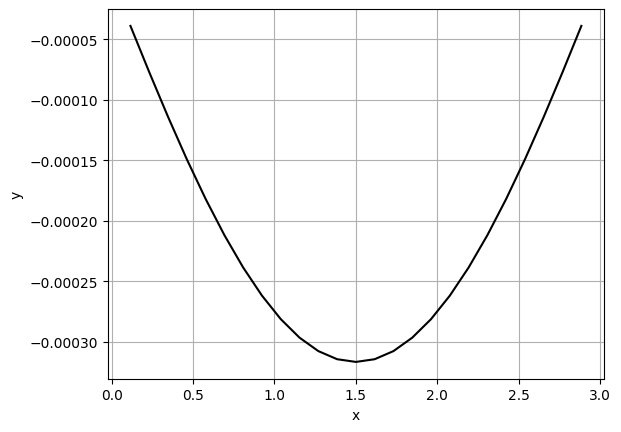

In [4]:
import numpy as np
import pylab

def tridiag(e,f,g,r):
    """
    tridiag: solves a set of n linear algebraic equations
             with a tridiagonal-banded coefficient matris
    input:
    e = subdiagonal vector of length n, first element = 0
    f = diagonal vector of length n
    g = superdiagonal vector of length n, last element = 0
    r = constant vector of length n
    output:
    x = solution vector of length n
    """
    n = len(f)
    # forward elimination
    x = np.zeros([n])
    for k in range(1,n):
        factor = e[k]/f[k-1]
        f[k] = f[k] - factor*g[k-1]
        r[k] = r[k] - factor*r[k-1]
    # back substitution
    x[n-1] = r[n-1]/f[n-1]
    for k in range(n-2,-1,-1):
        x[k] = ( r[k] - g[k]*x[k+1] )/f[k]
    return x

def Ralphie_BeamCalc(E,I,w,y0,yL,L,n):
    dx = L/(n+1)
    # set up coefficient vectors
    e = np.zeros((n))
    f = np.zeros((n))
    g = np.zeros((n))
    r = np.zeros((n))
    for i in range(n):
        f[i] = 2*E*I/dx**2
        if i < n-1:
            g[i] = - E*I/dx**2
        if i > 0:
            e[i] = - E*I/dx**2
    # and constant vector
    x = np.zeros((n))
    for i in range(n):
        x[i] = dx*(i+1)
        if i == 0:
            r[i] = -w*L/2*x[i] + w/2*x[i]**2 + E*I/dx**2*y0
        elif i == n-1:
            r[i] = -w*L/2*x[i] + w/2*x[i]**2 + E*I/dx**2*yL
        else:
            r[i] = -w*L/2*x[i] + w/2*x[i]**2
    # solve tridiagonal system
    y = tridiag(e,f,g,r)
    return x,y

E = 250e9  # N/m2
I = 3e-4  # m4
w = 22500  # N/m
y0 = 0  # m
yL = 0  # m
L = 3  # m
n = 25

(x,y) = Ralphie_BeamCalc(E,I,w,y0,yL,L,n)

pylab.plot(x,y,c='k')
pylab.grid()
pylab.xlabel('x')
pylab.ylabel('y')


문제: 상기 코드를 분석하여 설명하시오